In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Non-Linear Data

In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')
print(data.shape)
print(data.isnull().sum())
data.head()

(4898, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df = data.copy() 

In [4]:
X = df.drop('quality', axis=1)
Y = df[['quality']]
print(X.shape, Y.shape)

(4898, 11) (4898, 1)


### Normalizing Data

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


### Splitting Data

In [6]:
xtrain ,xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size=0.3, random_state=25, stratify=Y)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3428, 11) (3428, 1)
(1470, 11) (1470, 1)


In [7]:
model = LinearRegression(fit_intercept=True, n_jobs =1)

In [8]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model.coef_

array([[ 0.03017234, -0.19009333,  0.01327707,  0.35937357, -0.01166101,
         0.07037744, -0.01629756, -0.36027344,  0.09019794,  0.07425947,
         0.28265601]])

In [10]:
pred = model.predict(xtest)

In [11]:
print(pred[:5])
print(ytest[:5])

[[6.31107694]
 [5.99955503]
 [5.92657186]
 [5.61030416]
 [5.29218831]]
[[7]
 [6]
 [6]
 [5]
 [5]]


In [12]:
r2_score(pred, ytest)

-1.6746817417737483

## Linear Data

In [13]:
data = pd.read_csv('kc_house_data.csv')
df = data.copy()
print(df.shape)
print(df.isnull().sum())
df.head()

(21613, 21)
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
X = df.drop(['id', 'date', 'price'], axis=1)
Y = df[['price']]
print(X.shape)
print(Y.shape)

(21613, 18)
(21613, 1)


In [15]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [16]:
scaler = StandardScaler().fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [17]:
xtrain ,xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size=0.25, random_state=12)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(16209, 18) (16209, 1)
(5404, 18) (5404, 1)


In [18]:
model = LinearRegression(fit_intercept=True, n_jobs =1).fit(xtrain, ytrain)

In [19]:
pred = model.predict(xtest)

In [20]:
print(pred[:5])
print(ytest[:5])

[[277234.45040882]
 [104790.18690451]
 [261373.77979077]
 [815485.38067684]
 [558219.89035389]]
[[275000.]
 [279000.]
 [200500.]
 [750000.]
 [395000.]]


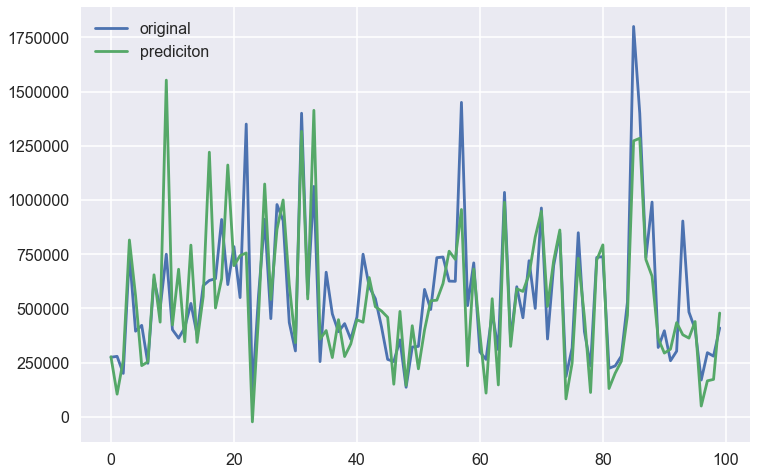

In [21]:
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.plot(ytest[:100], label='original');
plt.plot(pred[:100], label='prediciton');
plt.legend();

### SSR, SSE, R2, Adjusted R2

In [22]:
sse = np.sum((pred - ytest)**2)
sse

236076697953997.25

In [23]:
ssr = np.sum((pred - ytest.mean())**2)
ssr

497839327425604.75

In [24]:
sst = ssr + sse
sst

733916025379602.0

In [25]:
r2 = ssr/sst
r2

0.6783328203906002

In [26]:
n = len(ytest)
k = xtest.shape[-1]
adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
adj_r2

0.6772576097623793

### R2 vs Adjusted R2

In [27]:
def coeff(prd, ytst, xtst):
    sse = np.sum((prd - ytst)**2)
    ssr = np.sum((pred - ytst.mean())**2)
    sst = ssr + sse
    r2 = ssr/sst
    n = len(ytst)
    k = xtst.shape[-1]
    adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
    return r2, adj_r2

In [28]:
r_2 = []
adj_r_2 = []
for i in range(1, k+1):
    x_ = X.values[:, :i]
    xtr ,xtst, ytr, ytst = train_test_split(x_, Y.values, test_size=0.25, random_state=12)
    m = LinearRegression(fit_intercept=True, n_jobs =1).fit(xtr, ytr)
    prd = m.predict(xtst)
    r2_, adj_r2_ = coeff(prd, ytst, xtst)
    r_2.append(r2_)
    adj_r_2.append(adj_r2_)

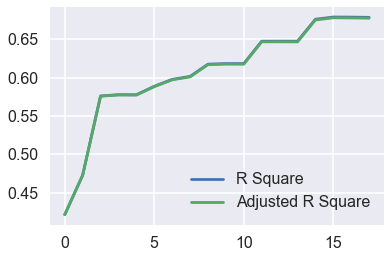

In [29]:
sns.set_context('poster')
plt.plot(r_2, label='R Square');
plt.plot(adj_r_2, label= 'Adjusted R Square');
plt.legend();

### KFold

**Diagram of 5-fold cross-validation**<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/07_cross_validation_diagram.png' width=200, height=400 >

In [30]:
from sklearn.model_selection import KFold

In [31]:
folds = KFold(n_splits=4, shuffle=True, random_state=25)

In [32]:
for x, y in folds.split(X, Y):
    print(x[:],len(x))
    print(y[:],len(y))

[    0     4     7 ... 21610 21611 21612] 16209
[    1     2     3 ... 21594 21605 21608] 5404
[    0     1     2 ... 21608 21609 21610] 16210
[    4    16    21 ... 21607 21611 21612] 5403
[    1     2     3 ... 21610 21611 21612] 16210
[    0     9    17 ... 21587 21600 21604] 5403
[    0     1     2 ... 21608 21611 21612] 16210
[    7    13    14 ... 21602 21609 21610] 5403


### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
model = LinearRegression(fit_intercept=True, n_jobs =1)

In [35]:
scores = cross_val_score(model, X, Y, cv=10)

In [36]:
print(scores)

[0.69572253 0.69825289 0.68884931 0.69253184 0.68095807 0.70406343
 0.70992094 0.70874403 0.69991629 0.6715889 ]


In [37]:
print(scores.mean())

0.6950548230407795
